In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
df.shape

(54808, 14)

In [6]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [7]:
df[df['education']=="Master's & above"]['age'].value_counts() # 30 and above are mostly Masters

34    1152
35    1110
33    1051
36    1041
37     957
32     889
38     832
39     780
40     763
41     623
31     615
42     570
43     471
44     434
45     353
46     333
30     311
47     295
48     261
50     261
49     212
51     188
53     168
52     165
54     154
55     140
56     129
57     121
58     113
29     111
59     111
60     100
28      53
27      30
26      17
20      11
Name: age, dtype: int64

In [8]:
df[df['education']=="Below Secondary"]['age'].value_counts()

24    204
23    144
25    128
26    100
22     98
21     52
20     33
27     25
28     16
30      2
29      2
31      1
Name: age, dtype: int64

In [9]:
df[df['education']=="Bachelor's"]['age'].value_counts() #25 to 30 years are mostly graduates.

30    3203
29    3094
28    2881
31    2791
27    2582
32    2558
33    2078
34    1843
26    1795
35    1531
36    1410
37    1160
38    1043
25    1005
39     867
40     860
41     637
42     560
43     492
24     481
44     390
45     386
46     351
48     287
50     246
47     244
49     222
51     190
52     178
53     177
23     169
54     151
55     144
56     134
57     114
60     110
58      94
59      91
22      67
20      48
21       5
Name: age, dtype: int64

In [10]:
def fill_null_education(cols):
    education = cols[0]
    age = cols[1]
    if pd.isnull(education):
        if age>30:
            return "Master's & above"
        else:
            return "Bachelor's"
    else:
        return education
        
    

In [11]:
df['education']=df[['education','age']].apply(fill_null_education,axis=1)

In [12]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [13]:
df[df['education']=="Master's & above"]['previous_year_rating'].value_counts()

3.0    5911
5.0    3692
4.0    3030
1.0    1839
2.0    1279
Name: previous_year_rating, dtype: int64

In [14]:
temp = pd.DataFrame(df.groupby('previous_year_rating')['education'].value_counts())
temp['education']

previous_year_rating  education       
1.0                   Bachelor's           4351
                      Master's & above     1839
                      Below Secondary        33
2.0                   Bachelor's           2928
                      Master's & above     1279
                      Below Secondary        18
3.0                   Bachelor's          12505
                      Master's & above     5911
                      Below Secondary       202
4.0                   Bachelor's           6747
                      Master's & above     3030
                      Below Secondary       100
5.0                   Bachelor's           7944
                      Master's & above     3692
                      Below Secondary       105
Name: education, dtype: int64

# Inference
1. So there's a ratio of 2:1 between the number of Bachelor and Masters in achieving each of the ratings. So we can assume that bachelor's degree are more likely to get rating below 4.


In [15]:
df['previous_year_rating'].fillna(value=df['previous_year_rating'].mode()[0],inplace=True)

In [16]:
for i in df.columns:
    print('**********Value Counts**********')
    print(df[i].value_counts())

**********Value Counts**********
2047     1
19228    1
4887     1
6934     1
789      1
        ..
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64
**********Value Counts**********
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**********Value Counts**********
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
reg

In [17]:
temp_1 = pd.DataFrame()

temp_1['Unique'] = df.nunique()
temp_1['Count'] = df.dtypes
temp_1['Null'] = df.isnull().sum()

In [18]:
temp_1

,Unique,Count,Null
employee_id,54808,int64,0
department,9,object,0
region,34,object,0
education,3,object,0
gender,2,object,0
recruitment_channel,3,object,0
no_of_trainings,10,int64,0
age,41,int64,0
previous_year_rating,5,float64,0
length_of_service,35,int64,0


In [19]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# EDA

Text(0, 0.5, 'Total Trainings')

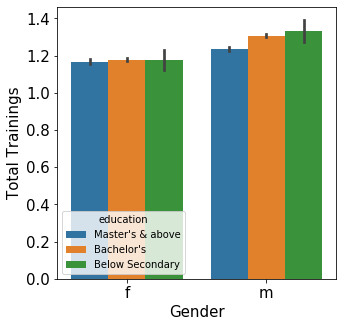

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['gender'],y=df['no_of_trainings'],hue=df['education'])
plt.xlabel('Gender',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total Trainings',fontsize=15)

# Inference
1. Hence Male Employees are more inclined towards undergoing trainings as compared to females in the organisation.

Text(0, 0.5, 'Total Recruitment through Channel')

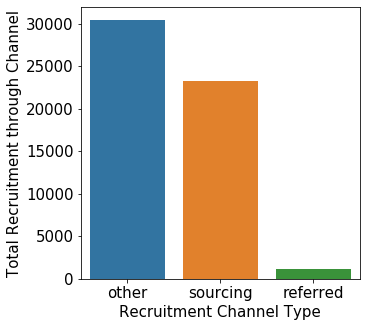

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(df['recruitment_channel'].value_counts().index,df['recruitment_channel'].value_counts())
plt.xlabel('Recruitment Channel Type',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total Recruitment through Channel',fontsize=15)

# Inference
1. Most number of recruitment were done through 'other' sources.
2. Least number of candidates were recruited through 'referred'

Text(0.5, 0, 'Age of Candidates')

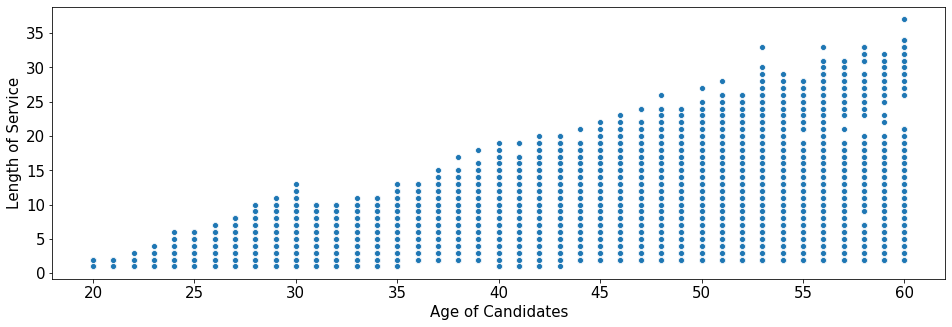

In [22]:
plt.figure(figsize=(16,5))
sns.scatterplot(df['age'],df['length_of_service'])
plt.ylabel('Length of Service',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age of Candidates',fontsize=15)


# Inference
1. We can observe that the age of candidates and length of their service are positively correlated.
2. Thus as higher age corresponds to a greater length of service in the organisation.

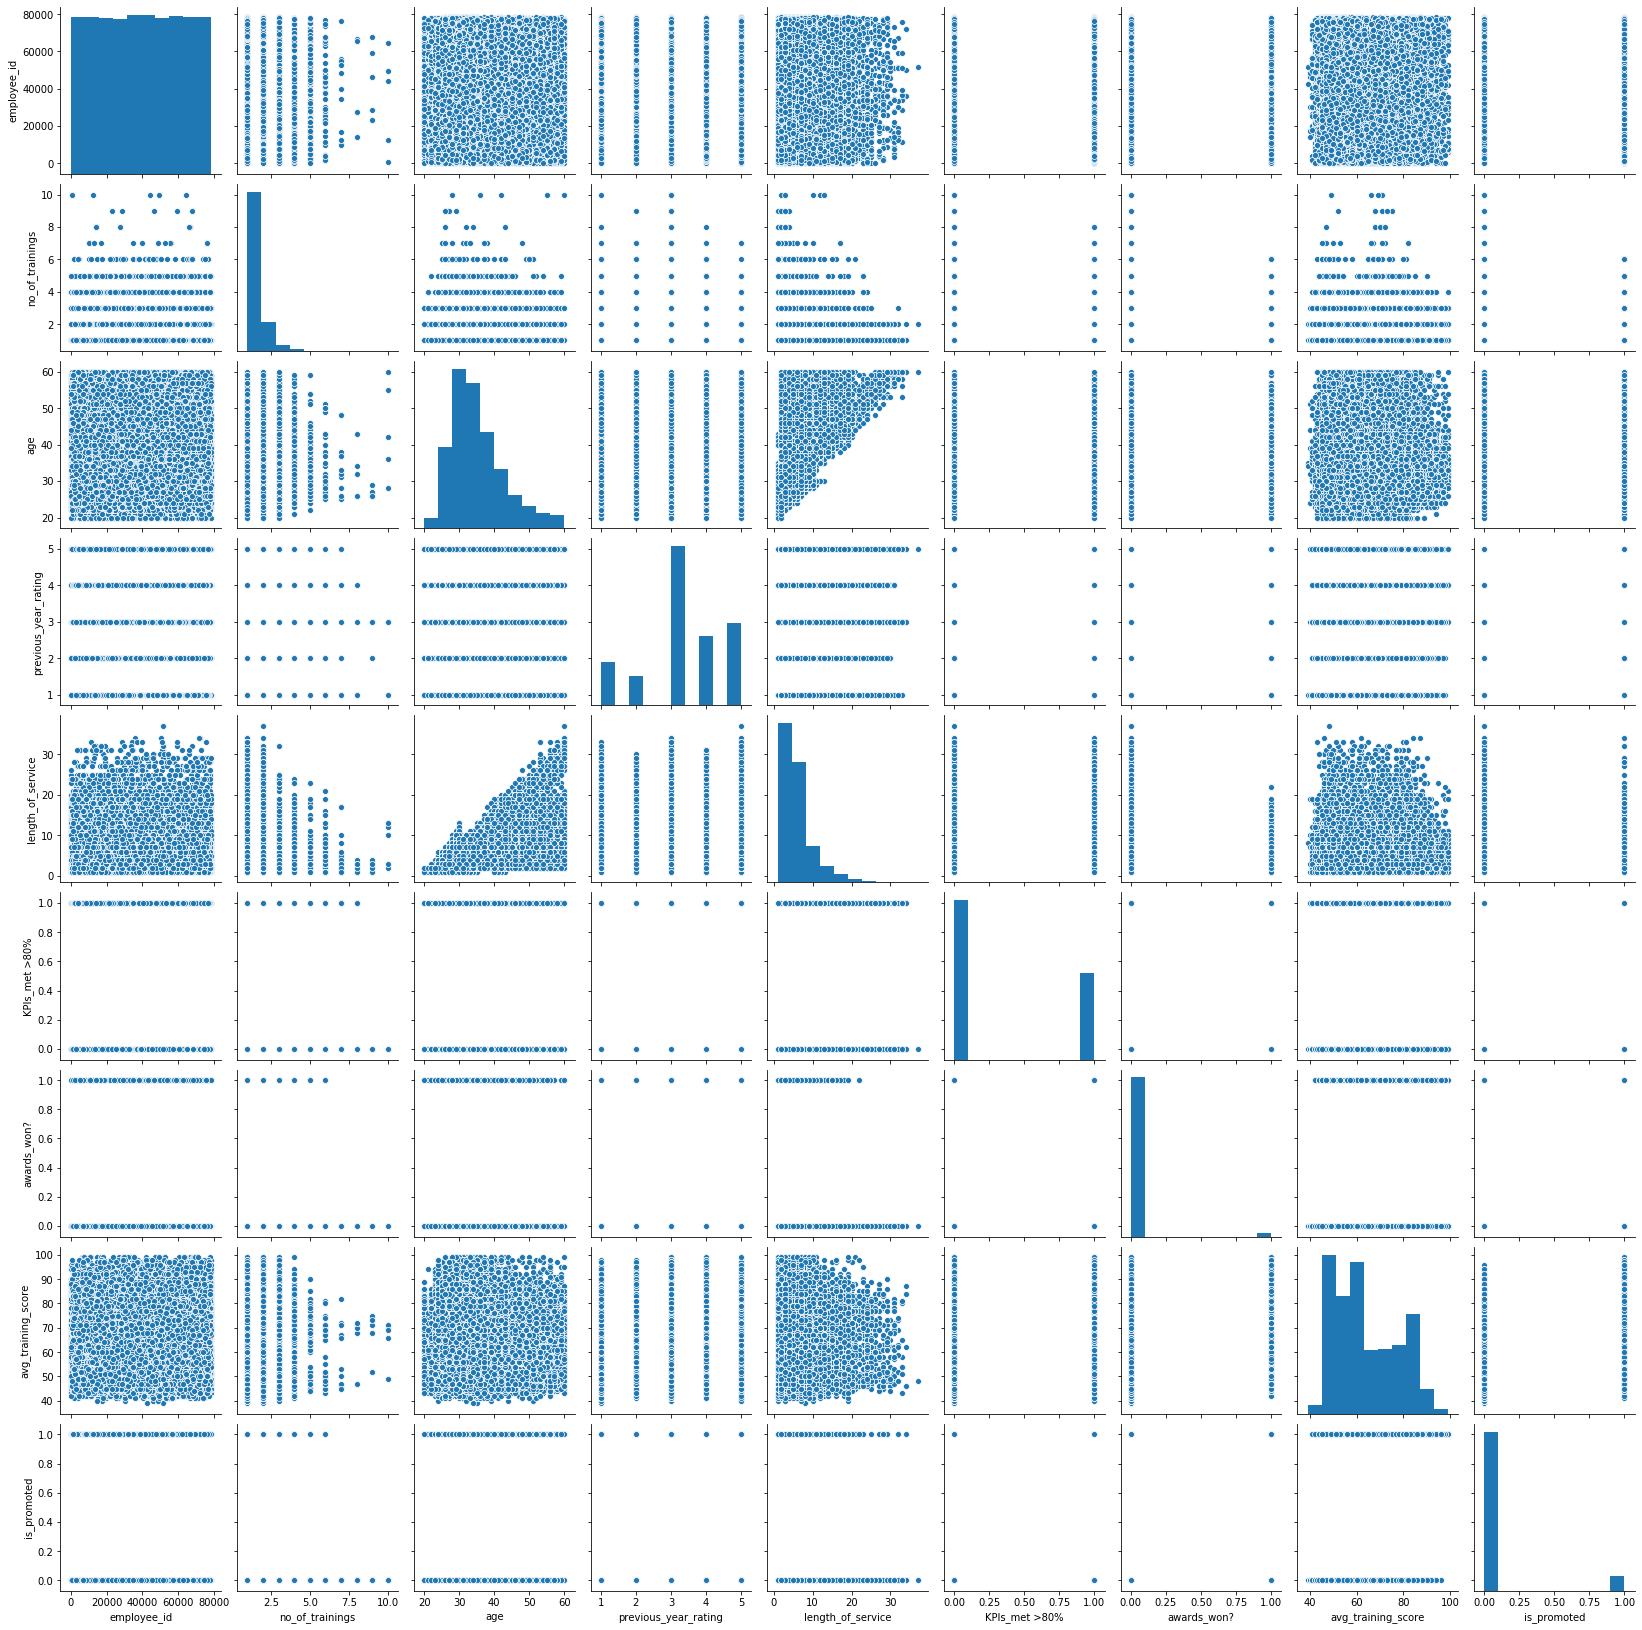

In [23]:
sns.pairplot(df)


# Inference
1. Age of candidates and the number of trainings undergone are slightly negatively correlated, so this proves that candidates with higher age are less inclined towards undergoing training.
This kind of makes sense since, freshers are subjected to more number of industrial trainings.



2. Length of service and number of trainings are negatively correlated, implying candidates with less number of trainings have greater length of service. This is an interesting observation.
One reason can be highly trained candidates may opt for other better paying jobs in the market.


3. Average training score and number of trainings are slightly negatively correlated, signifying that more number of trainings undertaken correspond to a lower average training score. This can be because people with less number of trainings must have scored high in one or two trainings whereas people with more number of trainings have a wide variety of scores obtained some may be less and some more.

Text(0, 0.5, 'Average Training Score')

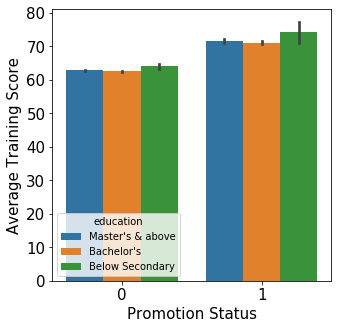

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['is_promoted'],y=df['avg_training_score'],hue=df['education'])
plt.xlabel('Promotion Status',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Average Training Score',fontsize=15)

# Inference
1. Candidates with Average Training Score of 70+ were promoted as per our data.

Text(0, 0.5, 'Length of Service')

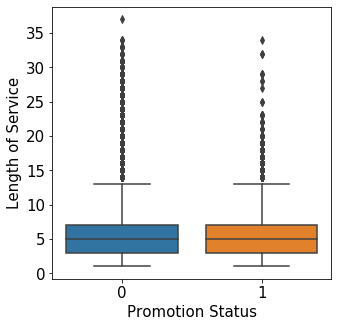

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df['is_promoted'],y=df['length_of_service'])
plt.xlabel('Promotion Status',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Length of Service',fontsize=15)

# Inference
1. We can carefully observe that the Promotion Status is not much dependent on the Length of service, because almost an equal number of candidates have been promoted regardless of their length of service.

# Skewness Treatment

In [26]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


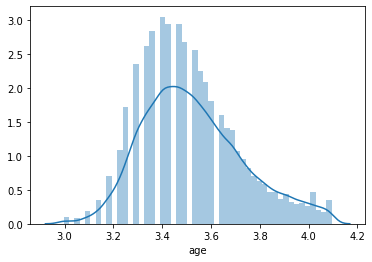

In [27]:
df['age'] = np.log(df['age'])
sns.distplot(df['age'])

In [28]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.555348,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,3.401197,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.526361,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,3.663562,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,3.806662,3.0,2,0,0,73,0


In [29]:
temp = pd.DataFrame(df.groupby('region')['is_promoted'].value_counts())
region_with_high_promotion = temp.unstack()['is_promoted'][1].sort_values(ascending=False)[:14].index
region_with_high_promotion

Index(['region_2', 'region_22', 'region_7', 'region_4', 'region_13',
       'region_15', 'region_28', 'region_26', 'region_23', 'region_27',
       'region_31', 'region_17', 'region_25', 'region_16'],
      dtype='object', name='region')

In [30]:
def region_feature(col):
    region = col
    if region in region_with_high_promotion:
        return 1
    else:
        return 0


In [31]:
df['region'] = df['region'].apply(region_feature)

In [32]:
df.drop(['employee_id'],axis=1,inplace=True)

In [33]:
df_final = pd.get_dummies(df)

In [34]:
df_final.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,1,3.555348,5.0,8,1,0,49,0,0,...,1,0,0,0,1,1,0,0,0,1
1,1,1,3.401197,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,0,1,3.526361,3.0,7,0,0,50,0,0,...,1,0,1,0,0,0,1,0,0,1
3,1,2,3.663562,1.0,10,0,0,50,0,0,...,1,0,1,0,0,0,1,1,0,0
4,1,1,3.806662,3.0,2,0,0,73,0,0,...,0,1,1,0,0,0,1,1,0,0


# Separating Dependent and Independent variables

In [35]:
x = df_final.drop('is_promoted',axis=1)
y=df_final['is_promoted']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report, f1_score


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [38]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# LOGISTIC REGRESSION

In [39]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred_train = logreg.predict(x_train)

In [41]:
f1 = f1_score(y_train,pred_train)
a = accuracy_score(y_train,pred_train)
print('F1 Score for Training Data = ',f1)
print('Accuracy Score for Training Data = ',a)

F1 Score for Training Data =  0.4041499646309833
Accuracy Score for Training Data =  0.9311837912910869


In [42]:
print('CLASSIFICATION REPORT AND CONFUSION MATRIX TRAIN DATA')
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

CLASSIFICATION REPORT AND CONFUSION MATRIX TRAIN DATA
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     33527
           1       0.82      0.27      0.40      3194

    accuracy                           0.93     36721
   macro avg       0.88      0.63      0.68     36721
weighted avg       0.92      0.93      0.91     36721

[[33337   190]
 [ 2337   857]]


In [43]:
pred_test = logreg.predict(x_test)

In [44]:
f1 = f1_score(y_test,pred_test)
a = accuracy_score(y_test,pred_test)
print('F1 Score for Testing Data = ',f1)
print('Accuracy Score for Testing Data = ',a)

F1 Score for Testing Data =  0.4
Accuracy Score for Testing Data =  0.9351467905125228


In [45]:
print('CLASSIFICATION REPORT AND CONFUSION MATRIX TEST DATA')
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

CLASSIFICATION REPORT AND CONFUSION MATRIX TEST DATA
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     16613
           1       0.81      0.27      0.40      1474

    accuracy                           0.94     18087
   macro avg       0.88      0.63      0.68     18087
weighted avg       0.93      0.94      0.92     18087

[[16523    90]
 [ 1083   391]]


# Performing Grid-Search 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
penalty = ['l1','l2']
C=np.logspace(0, 5, 10)

In [48]:
hyperparameters = dict(C=C,penalty=penalty)

In [49]:
gridsearch = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [50]:
best_model = gridsearch.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

In [51]:
pred_grid_search = best_model.predict(x_train)

In [52]:
f1 = f1_score(y_train,pred_grid_search)
a = accuracy_score(y_train,pred_grid_search)
print('F1 Score for Training Data = ',f1)
print('Accuracy Score for Training Data = ',a)

F1 Score for Training Data =  0.4071546246175571
Accuracy Score for Training Data =  0.9314016502818551


In [53]:
pred_grid_search_test = best_model.predict(x_test)

In [54]:
f1 = f1_score(y_test,pred_grid_search_test)
a = accuracy_score(y_test,pred_grid_search_test)
print('F1 Score for Testing Data = ',f1)
print('Accuracy Score for Testing Data = ',a)

F1 Score for Testing Data =  0.4012251148545177
Accuracy Score for Testing Data =  0.9351467905125228


# XGBOOST 

In [55]:
import xgboost as xgb

In [56]:
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
pred_xg_train = clf.predict(x_train)
f1 = f1_score(y_train, pred_xg_train)
a = accuracy_score(y_train,pred_xg_train)
print('F1 Score for Training Data = ',f1)
print('Accuracy Score for Training Data = ',a)

F1 Score for Training Data =  0.5889839806890498
Accuracy Score for Training Data =  0.9489937637863892


In [57]:
pred_xg_test = clf.predict(x_test)
f1 = f1_score(y_test, pred_xg_test)
a = accuracy_score(y_test,pred_xg_test)
print('F1 Score for Testing Data = ',f1)
print('Accuracy Score for Testing Data = ',a)

F1 Score for Testing Data =  0.5077071290944123
Accuracy Score for Testing Data =  0.9434953281362305


# GridSearchCV XGBOOST

In [58]:
xgb_model = xgb.XGBClassifier()
from sklearn.model_selection import StratifiedKFold

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'n_estimators': [600], 'learning_rate':[0.05], 'max_depth':[8], 'min_samples_leaf':[75], 'reg_lambda':[10] ,'scale_pos_weight' : [1], 'n_jobs':[-1]}


clf_grid_xg = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf_grid_xg.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.3min finished


[11:32:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.05], 'max_depth': [8],
        

In [59]:
pred_xgGrid_train = clf_grid_xg.predict(x_train)
f1 = f1_score(y_train, pred_xgGrid_train)
a = accuracy_score(y_train, pred_xgGrid_train)
print('Accuracy Score for Training Data = ',a)
print('F1 Score for Training Data = ',f1)

Accuracy Score for Training Data =  0.9466790120094769
F1 Score for Training Data =  0.563336306868867


In [60]:
pred_xgGrid_test = clf_grid_xg.predict(x_test)
f1 = f1_score(y_test, pred_xgGrid_test)
a = accuracy_score(y_test, pred_xgGrid_test)
print('Accuracy Score for Testing Data = ',a)
print('F1 Score for Testing Data = ',f1)

Accuracy Score for Testing Data =  0.9447669596948084
F1 Score for Testing Data =  0.5105340519353258


# Performing Ensembling of Models
#### Stastical Mode as criteria.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model

In [62]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
f1_score(y_test,pred1)

0.4

# KNN Classifier

In [63]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
a = accuracy_score(y_test, pred2)
print('Accuracy Score for Testing Data = ',a)
f1 = f1_score(y_test,pred2)
print('F1 Score for Testing Data = ',f1)

Accuracy Score for Testing Data =  0.8968319787692818
F1 Score for Testing Data =  0.33452211126961484


# Decision Tree Classifier

In [64]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
a = accuracy_score(y_test, pred3)
print('Accuracy Score for Testing Data = ',a)
f1 = f1_score(y_test,pred3)
print('F1 Score for Testing Data = ',f1)


Accuracy Score for Testing Data =  0.8960579421684083
F1 Score for Testing Data =  0.41687344913151364


# Random Forest Classifier

In [65]:
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
pred4=model4.predict(x_test)

a = accuracy_score(y_test, pred4)
print('Accuracy Score for Testing Data = ',a)
f1 = f1_score(y_test,pred4)
print('F1 Score for Testing Data = ',f1)

Accuracy Score for Testing Data =  0.9361419804279316
F1 Score for Testing Data =  0.45800093852651336


### Ensembling the Models Together

In [66]:
from scipy import stats as s
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, s.mode([pred1[i], pred3[i],pred_xgGrid_test[i]])[0])

In [67]:
f1 = f1_score(y_test,final_pred)
a = accuracy_score(y_test,final_pred)
print('Accuracy Score for Testing Data = ',a)
print('F1 Score for Testing Data = ',f1)

Accuracy Score for Testing Data =  0.9444352297230054
F1 Score for Testing Data =  0.5090376160234489


# Test Data Prediction

In [68]:
test_df = pd.read_csv('test_2umaH9m.csv')
test_df.shape

(23490, 13)

In [69]:
test_df['education']= test_df[['education','age']].apply(fill_null_education,axis=1)

In [70]:
test_df['previous_year_rating'].fillna(value=test_df['previous_year_rating'].mode()[0],inplace=True)

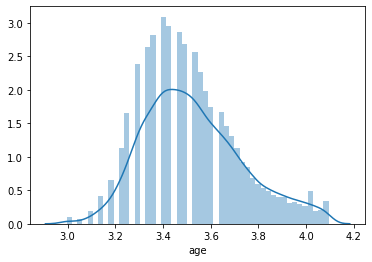

In [71]:
test_df['age'] = np.log(test_df['age'])
sns.distplot(test_df['age'])

In [72]:
test_df['region'] = test_df['region'].apply(region_feature)

In [73]:
test = test_df.drop(['employee_id'],axis=1)

In [74]:
test_final = pd.get_dummies(test)

In [75]:
scaler =StandardScaler()
test_final = scaler.fit_transform(test_final)


In [76]:
test_predict = clf_grid_xg.predict(test_final)

In [77]:
test_df['is_promoted'] = test_predict

In [78]:
predictions = pd.DataFrame(test_df[['employee_id','is_promoted']])

In [79]:
predictions['is_promoted'].value_counts()

0    22762
1      728
Name: is_promoted, dtype: int64

# Inference
## 1. Hence, as per our predictions out of 23490 candidates, 728 should be promoted by the organisation.

In [80]:
predictions.head(10)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


In [81]:
predictions.to_csv('C://Users//sudar//OneDrive//Desktop//Work Files//Techvolt//submission_file.csv')